# Explore the data using the manual network with GRN 

The goal is to see if the data is acceptable or if it is useless. This notebook goes with the toy_network_data_exploration notebook which contains the proof of concept on some literature verified nodes.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import pickle
import matplotlib.pyplot as plt

In [5]:
# Load the log-expression data (with Poisson noise)
expression_sc = pd.read_csv("../../CAR_data/log_sc_expr_with_celltypes_with_noise.csv")
# Load the log-expression data (without noise) for computing correlations
expression_sc_no_noise = pd.read_csv("../../CAR_data/log_sc_expr_with_celltypes.csv")
# Load the log-expression data (without noise) for computing correlations
# Load the dictionnary containing the graph information
parents_dict = pickle.load(open("../../CAR_data/upstream_node_dict", "rb"))

# Print the dictionnary
for key, value in parents_dict.items():
    print(f"{key}: {value}")

ATF1: ['CD3z', 'MAPK', 'p38']
ATF2: ['ERK12', 'p38']
BCL3: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
CEBPB: ['ERK12', 'p38']
CEBPZ: ['CD3z', 'MAPK', 'p38']
E2F4: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
ELK1: ['ERK12', 'p38']
ELK4: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
ESR1: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
ETS1: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
FOS: ['BCL3', 'E2F4', 'ELK4', 'ERK12', 'ETS1', 'FOSL2', 'GABPA', 'JUN', 'MEF2A', 'MYC', 'NANOG', 'RELA', 'SP1']
FOSL1: ['CD3z', 'MAPK', 'p38']
FOSL2: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
GABPA: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
GATA1: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
GATA2: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
HSF1: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
IRF3: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
JUN: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
JUND: ['CD3z', 'MAPK', 'p38']
MEF2A: ['CD3z', 'MAPK', 'p38']
MEF2C: ['CD3z', 'MAPK', 'p38']
MYC: ['ERK12', 'MAPK', 'PI3K', 'PP2A', 'SHP2']
NANOG: [

# The proof-of-concept node: ATF2 as a function of p38 and ERK12

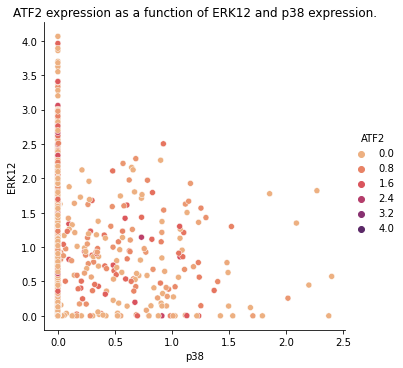

In [3]:
g = sns.relplot(
    data= expression_sc,
    x="p38", y="ERK12", hue="ATF2",
    height=5, palette="flare")
g.set(title = "ATF2 expression as a function of ERK12 and p38 expression.")

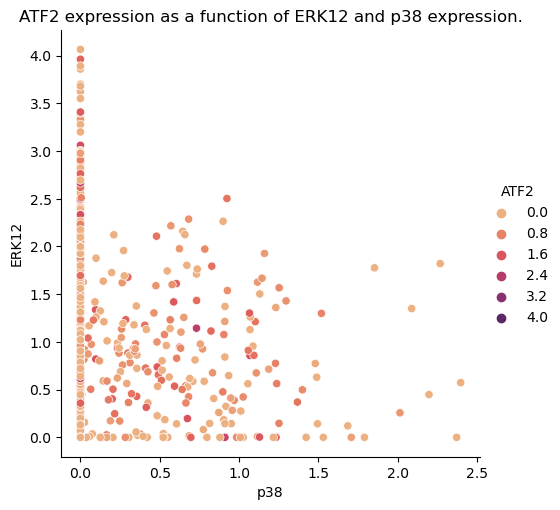

In [4]:
# The same plot but removing the 0-values of the parents, so that the plot is readable

zero_ERK12 = expression_sc[expression_sc["ERK12"]!= 0]
zero_p38 = expression_sc[expression_sc["p38"]!= 0]
zero_ERK12_p38 = zero_ERK12[zero_ERK12["p38"]!= 0]

g = sns.relplot(
    data= expression_sc,
    x="p38", y="ERK12", hue="ATF2",
    height=5, palette="flare")
g.set(title = "ATF2 expression as a function of ERK12 and p38 expression.")

In [6]:
expression_sc_no_noise["ATF2"].corr(expression_sc_no_noise["p38"], "kendall")

0.06240681062838579

In [7]:
expression_sc_no_noise["ATF2"].corr(expression_sc_no_noise["ERK12"], "kendall")

0.05671066069489006

In [8]:
expression_sc["ATF2"].corr(expression_sc["p38"], "kendall")

0.08295908401566077

In [9]:
expression_sc["ATF2"].corr(expression_sc["p38"], "kendall")

0.08295908401566077

We lost some of the extreme values of p38, which occurred when ERK12 was equal to 0 (is this just chance or is there a biological relationship there?)

/tmp/ipykernel_71993/2659521729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_ERK12_p38["bin_p38"] = pd.cut(zero_ERK12_p38["p38"], 10, labels = False)
/tmp/ipykernel_71993/2659521729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_ERK12_p38["bin_ERK12"] = pd.cut(zero_ERK12_p38["ERK12"], 10, labels = False)


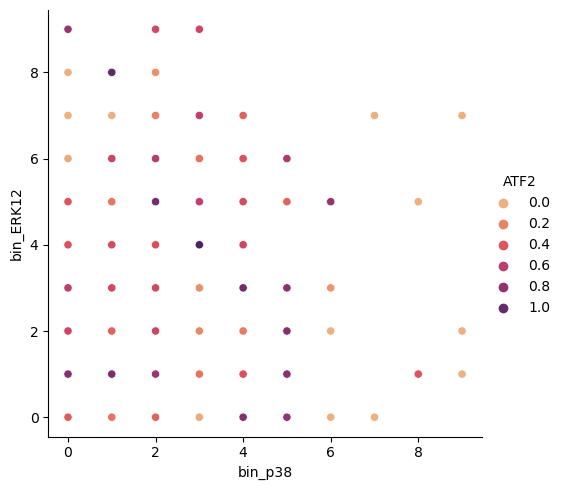

In [10]:
# The same plot but binning by the values with the parents

zero_ERK12_p38["bin_p38"] = pd.cut(zero_ERK12_p38["p38"], 10, labels = False)
zero_ERK12_p38["bin_ERK12"] = pd.cut(zero_ERK12_p38["ERK12"], 10, labels = False)
mean_ERK12_p38 = zero_ERK12_p38.groupby(["bin_p38", "bin_ERK12"]).mean().reset_index()
g = sns.relplot(
    data= mean_ERK12_p38,
    x="bin_p38", y="bin_ERK12", hue="ATF2",
    height=5, palette="flare")

## Again with the raw counts
 
 

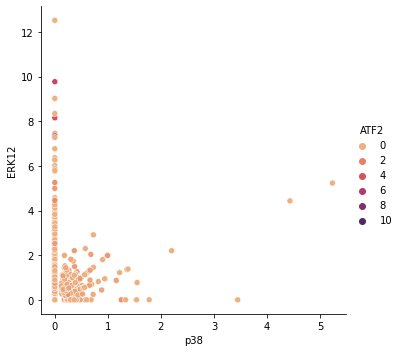

In [3]:
raw_counts = pd.read_csv("../../CAR_data/raw_counts_depth_normalized_genes_of_interest_celltypes.csv", index_col = 0)
g = sns.relplot(
    data= raw_counts,
    x="p38", y="ERK12", hue="ATF2",
    height=5, palette="flare")

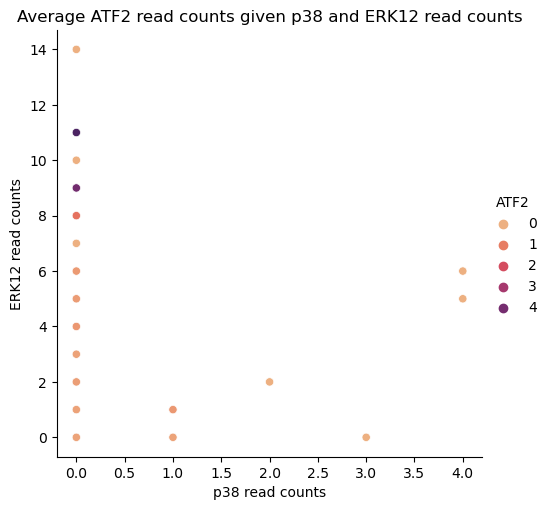

In [6]:
raw_counts["bin_p38"] = pd.cut(raw_counts["p38"], 5, labels = False)
raw_counts["bin_ERK12"] = pd.cut(raw_counts["ERK12"], 15, labels = False)
mean_ERK12_p38_counts = raw_counts.groupby(["bin_p38", "bin_ERK12"]).mean().reset_index()
g = sns.relplot(
    data= mean_ERK12_p38_counts,
    x="bin_p38", y="bin_ERK12", hue="ATF2",
    height=5, palette="flare")
g.set( title = "Average ATF2 read counts given p38 and ERK12 read counts")
g.set(xlabel = "p38 read counts")
g.set(ylabel = "ERK12 read counts")

In [4]:
# Kendall correlation
from scipy.stats import kendalltau
print(raw_counts["ATF2"].corr(raw_counts["ERK12"], "kendall"))
print(raw_counts["ATF2"].corr(raw_counts["p38"], "kendall"))

print(kendalltau(raw_counts["ATF2"],raw_counts["ERK12"] ))

print(kendalltau(raw_counts["ATF2"],raw_counts["p38"] ))

0.05671112211280822
0.06240681062838579
KendalltauResult(correlation=0.05671112211280822, pvalue=4.497849048287217e-07)
KendalltauResult(correlation=0.06240681062838579, pvalue=1.643519220949925e-06)


##  Same plots for CEBPB which is also a child node of ERK12 and p38


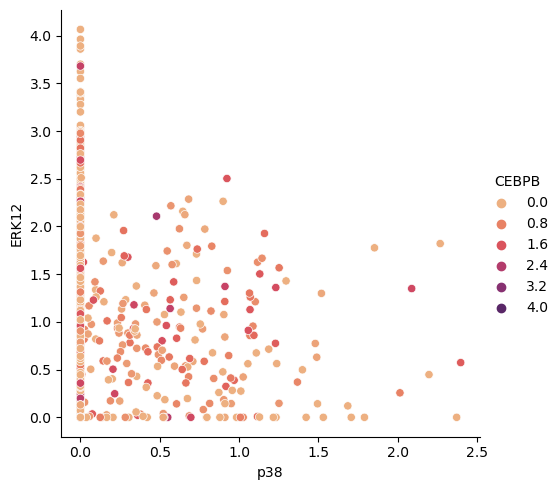

In [13]:
g = sns.relplot(
    data= expression_sc,
    x="p38", y="ERK12", hue="CEBPB",
    height=5, palette="flare")

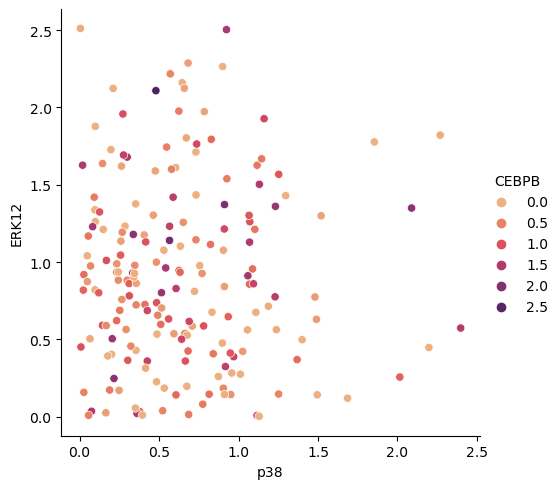

In [14]:
# The same plot but removing the 0-values of the parents, so that the plot is readable

g = sns.relplot(
    data= zero_ERK12_p38,
    x="p38", y="ERK12", hue="CEBPB",
    height=5, palette="flare")

We lost some of the extreme values of p38, which occurred when ERK12 was equal to 0 (is this just chance or is there a biological relationship there?)

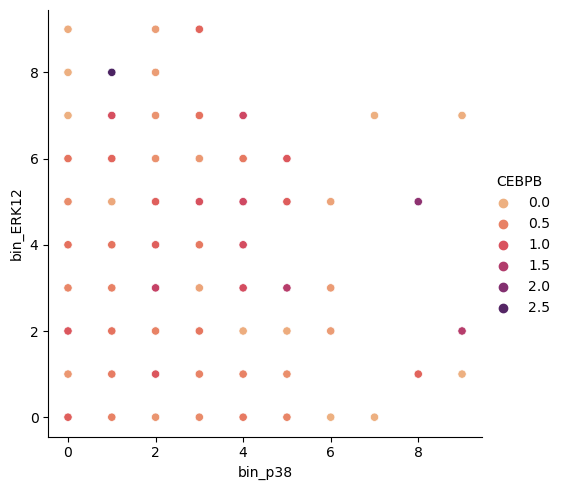

In [15]:
# The same plot but binning by the values with the parents
g = sns.relplot(
    data= mean_ERK12_p38,
    x="bin_p38", y="bin_ERK12", hue="CEBPB",
    height=5, palette="flare")

## With the raw counts

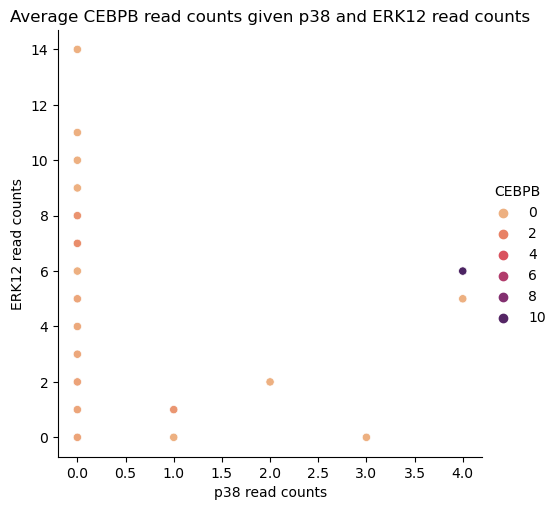

In [7]:
g = sns.relplot(
    data= mean_ERK12_p38_counts,
    x="bin_p38", y="bin_ERK12", hue="CEBPB",
    height=5, palette="flare")
g.set( title = "Average CEBPB read counts given p38 and ERK12 read counts")
g.set(xlabel = "p38 read counts")
g.set(ylabel = "ERK12 read counts")

# Try with a more multifaceted relationship : MAPK, p38 and CD3z as parents

This is the case of many nodes, such as ATF1, CEPBZ, NFATC1, MEF2A, etc.

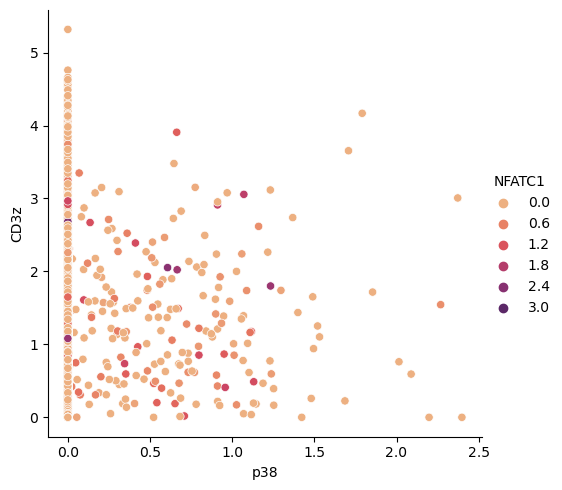

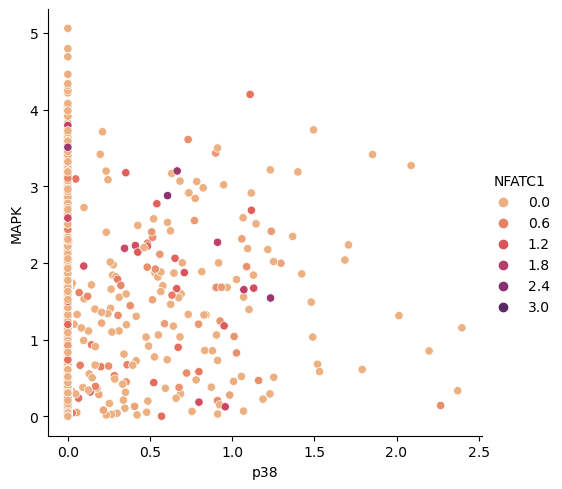

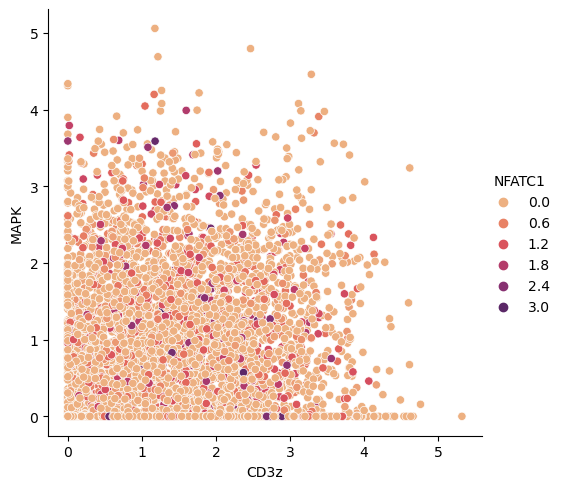

In [17]:
g = sns.relplot(
    data= expression_sc,
    x="p38", y="CD3z", hue = "NFATC1",
    height=5, palette="flare")

g = sns.relplot(
    data= expression_sc,
    x="p38", y="MAPK", hue = "NFATC1",
    height=5, palette="flare")


g = sns.relplot(
    data= expression_sc,
    x="CD3z", y="MAPK", hue = "NFATC1",
    height=5, palette="flare")

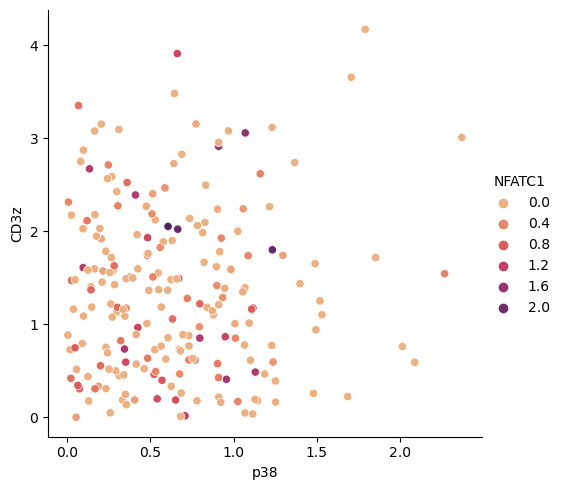

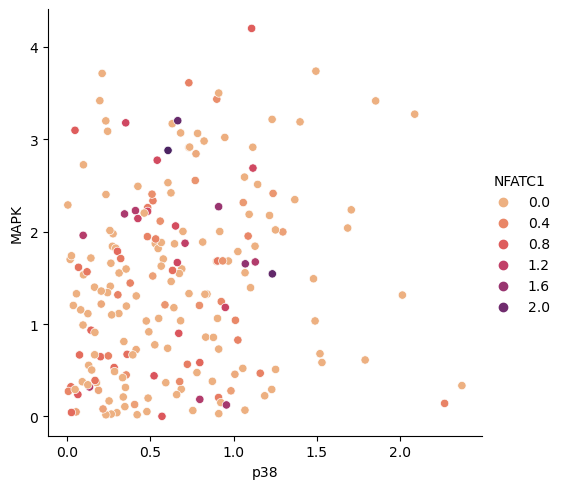

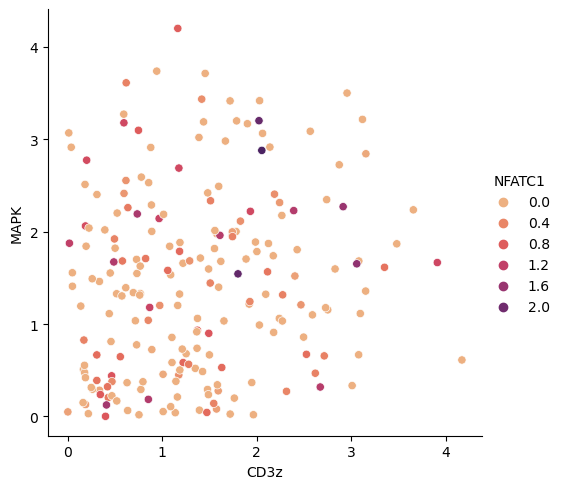

In [18]:
# The same plot but removing the 0-values of the parents, so that the plot is readable

zero_p38_CD3z = zero_p38[zero_p38["CD3z"]!= 0]
zero_p38_MAPK = zero_p38[zero_p38["MAPK"] != 0]
zero_p38_MAPK_CD3z = zero_p38_MAPK[zero_p38_MAPK["CD3z"] !=0]
zero_MAPK = expression_sc[expression_sc["MAPK"] != 0]
zero_CD3z = expression_sc[expression_sc["CD3z"] != 0]
zero_MAPK_CD3z = zero_MAPK[zero_MAPK["CD3z"] != 0]
 
# With all 3 parents set to 0
g = sns.relplot(
    data= zero_p38_MAPK_CD3z,
    x="p38", y="CD3z", hue = "NFATC1",
    height=5, palette="flare")

g = sns.relplot(
    data= zero_p38_MAPK_CD3z,
    x="p38", y="MAPK", hue = "NFATC1",
    height=5, palette="flare")


g = sns.relplot(
    data= zero_p38_MAPK_CD3z,
    x="CD3z", y="MAPK", hue = "NFATC1",
    height=5, palette="flare")

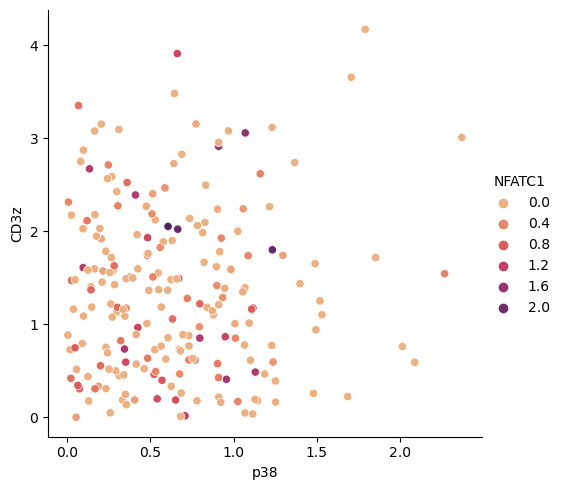

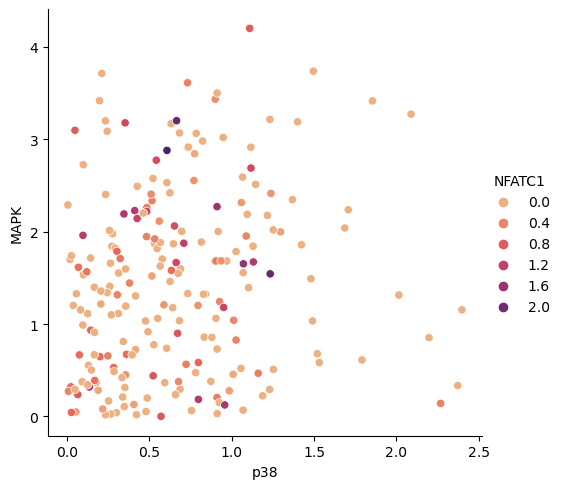

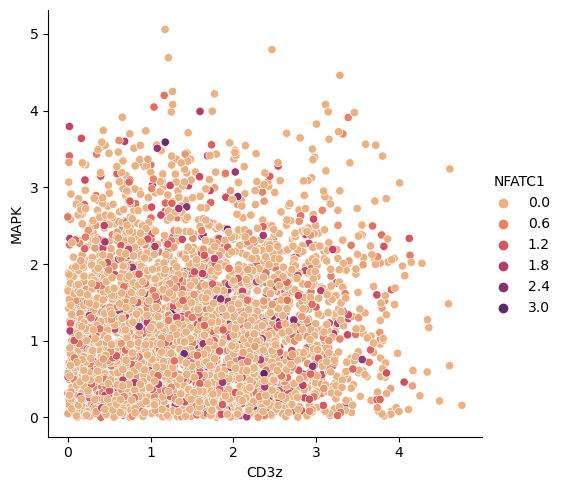

In [19]:
# With only the 2 plotted parents set to 0

g = sns.relplot(
    data= zero_p38_CD3z,
    x="p38", y="CD3z", hue = "NFATC1",
    height=5, palette="flare")

g = sns.relplot(
    data= zero_p38_MAPK,
    x="p38", y="MAPK", hue = "NFATC1",
    height=5, palette="flare")


g = sns.relplot(
    data= zero_MAPK_CD3z,
    x="CD3z", y="MAPK", hue = "NFATC1",
    height=5, palette="flare")

/tmp/ipykernel_71993/405271861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_p38_MAPK_CD3z["bin_p38"] = pd.cut(zero_p38_MAPK_CD3z["p38"], 10, labels = False)
/tmp/ipykernel_71993/405271861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_p38_MAPK_CD3z["bin_MAPK"] = pd.cut(zero_p38_MAPK_CD3z["MAPK"], 10, labels = False)
/tmp/ipykernel_71993/405271861.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

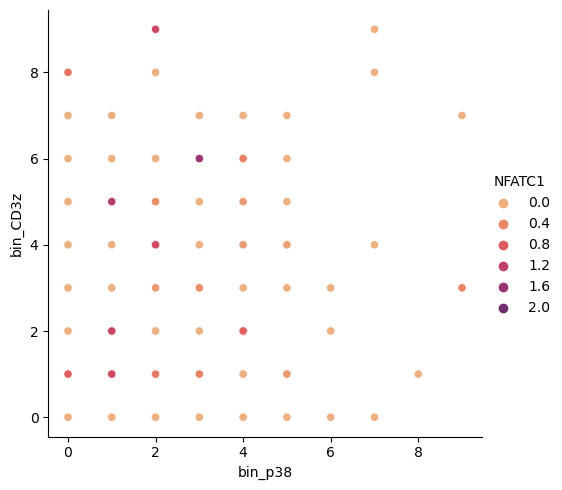

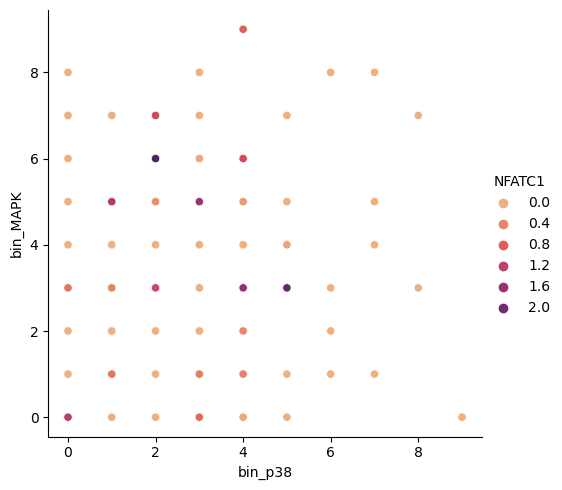

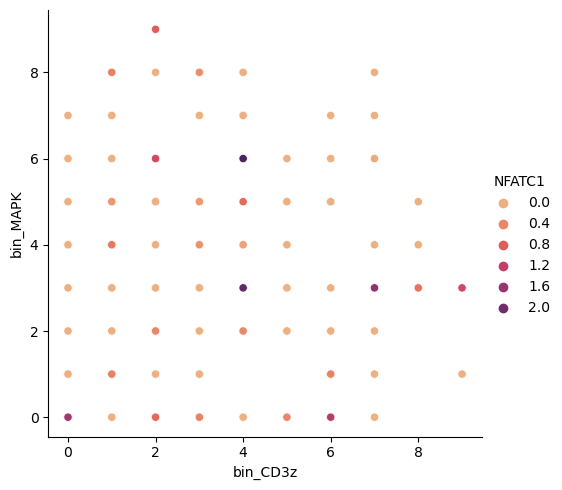

In [20]:
# The same plot but binning by the values with the parents

zero_p38_MAPK_CD3z["bin_p38"] = pd.cut(zero_p38_MAPK_CD3z["p38"], 10, labels = False)
zero_p38_MAPK_CD3z["bin_MAPK"] = pd.cut(zero_p38_MAPK_CD3z["MAPK"], 10, labels = False)
zero_p38_MAPK_CD3z["bin_CD3z"] = pd.cut(zero_p38_MAPK_CD3z["CD3z"], 10, labels = False)

mean_p38_MAPK_CD3z = zero_p38_MAPK_CD3z.groupby(["bin_p38", "bin_CD3z", "bin_MAPK"]).mean().reset_index()

g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_CD3z", hue = "NFATC1",
    height=5, palette="flare")

g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_MAPK", hue = "NFATC1",
    height=5, palette="flare")


g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_CD3z", y="bin_MAPK", hue = "NFATC1",
    height=5, palette="flare")

## With the raw counts

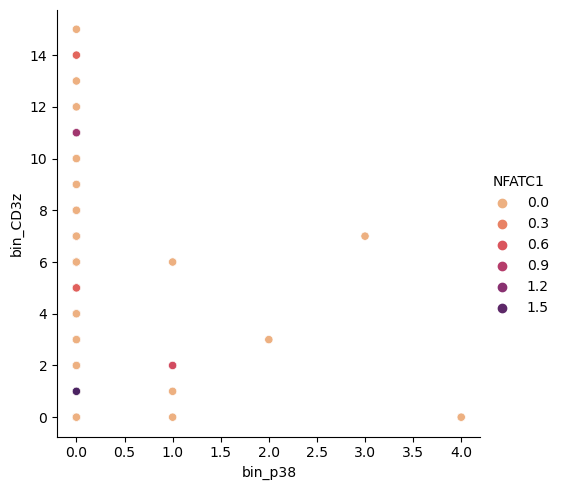

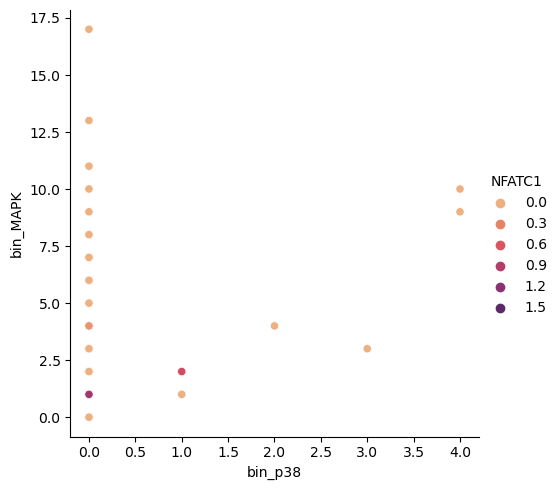

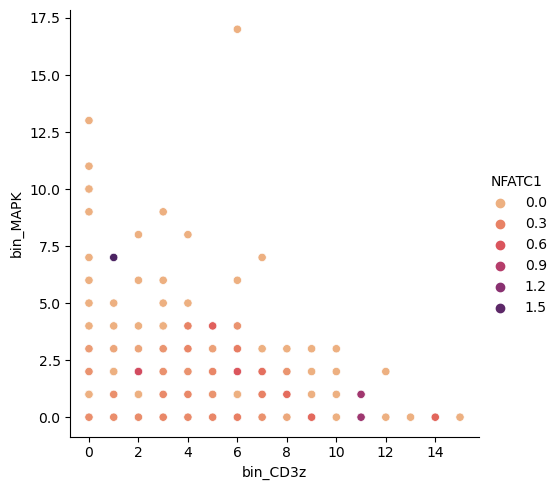

In [8]:
raw_counts["bin_CD3z"] = pd.cut(raw_counts["CD3z"], int(max(raw_counts["CD3z"])+1), labels = False)
raw_counts["bin_MAPK"] = pd.cut(raw_counts["MAPK"], int(max(raw_counts["MAPK"])+1), labels = False)
mean_p38_MAPK_CD3z = raw_counts.groupby(["bin_CD3z", "bin_MAPK", "bin_p38"]).mean().reset_index()

g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_CD3z", hue = "NFATC1",
    height=5, palette="flare")

g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_MAPK", hue = "NFATC1",
    height=5, palette="flare")


g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_CD3z", y="bin_MAPK", hue = "NFATC1",
    height=5, palette="flare")

## The same thing with another random TF

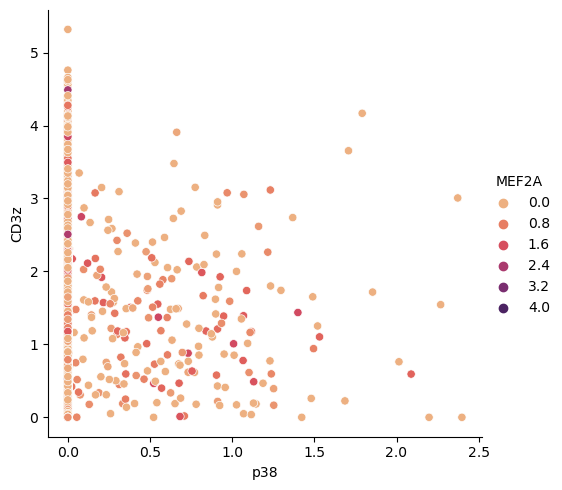

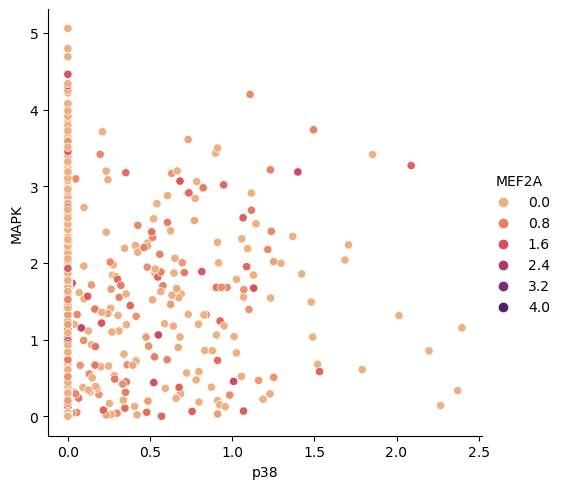

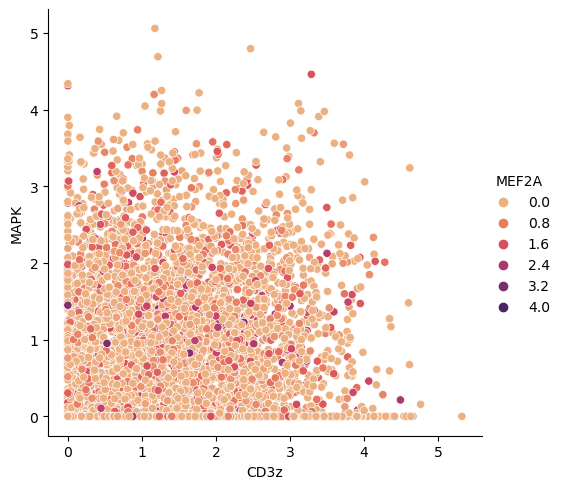

In [22]:
g = sns.relplot(
    data= expression_sc,
    x="p38", y="CD3z", hue = "MEF2A",
    height=5, palette="flare")

g = sns.relplot(
    data= expression_sc,
    x="p38", y="MAPK", hue = "MEF2A",
    height=5, palette="flare")


g = sns.relplot(
    data= expression_sc,
    x="CD3z", y="MAPK", hue = "MEF2A",
    height=5, palette="flare")

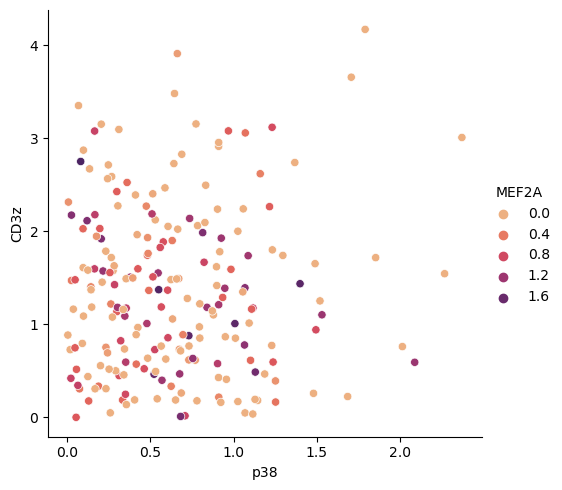

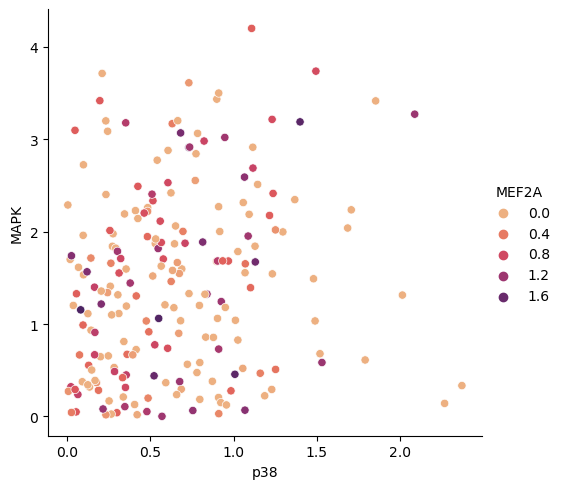

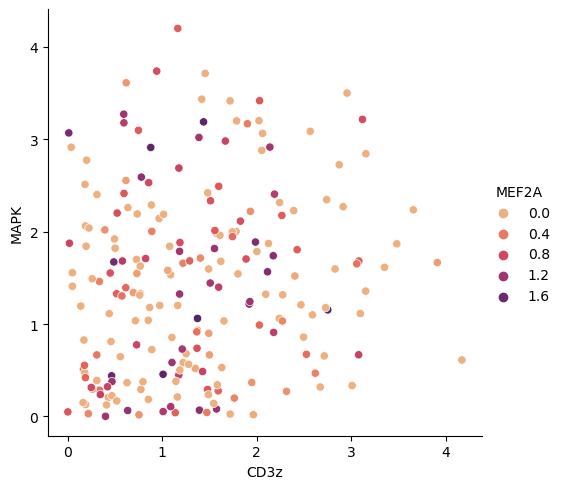

In [23]:
# Remove the cells which have a zero value at one of the parent nodes

g = sns.relplot(
    data= zero_p38_MAPK_CD3z,
    x="p38", y="CD3z", hue = "MEF2A",
    height=5, palette="flare")

g = sns.relplot(
    data= zero_p38_MAPK_CD3z,
    x="p38", y="MAPK", hue = "MEF2A",
    height=5, palette="flare")


g = sns.relplot(
    data= zero_p38_MAPK_CD3z,
    x="CD3z", y="MAPK", hue = "MEF2A",
    height=5, palette="flare")

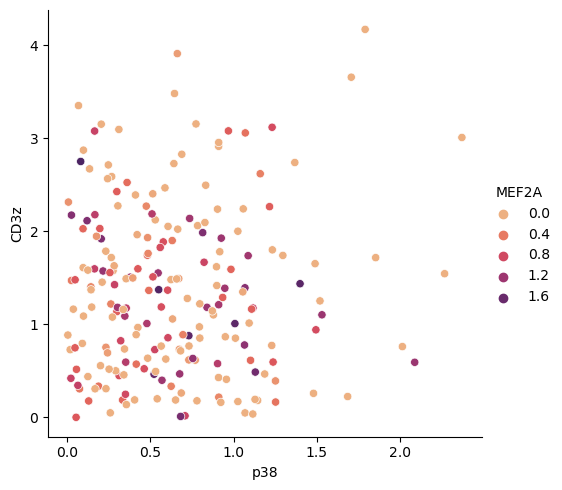

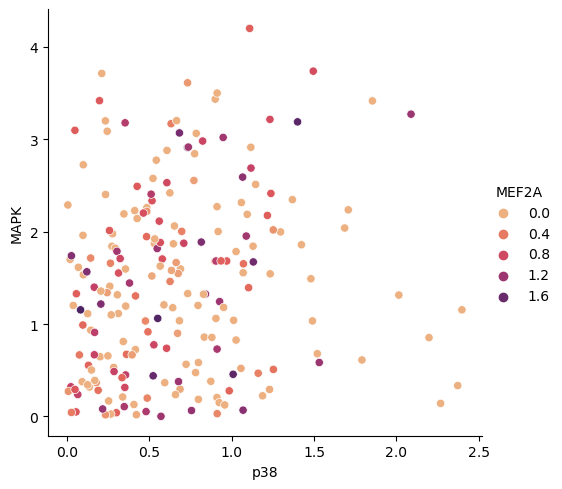

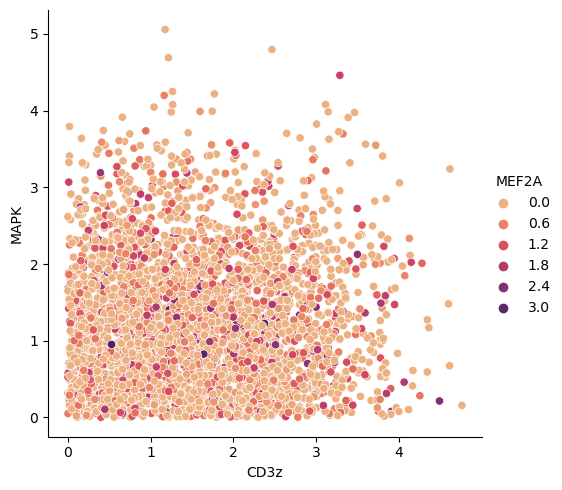

In [24]:
# With only the 2 plotted parents set to 0

g = sns.relplot(
    data= zero_p38_CD3z,
    x="p38", y="CD3z", hue = "MEF2A",
    height=5, palette="flare")

g = sns.relplot(
    data= zero_p38_MAPK,
    x="p38", y="MAPK", hue = "MEF2A",
    height=5, palette="flare")


g = sns.relplot(
    data= zero_MAPK_CD3z,
    x="CD3z", y="MAPK", hue = "MEF2A",
    height=5, palette="flare")

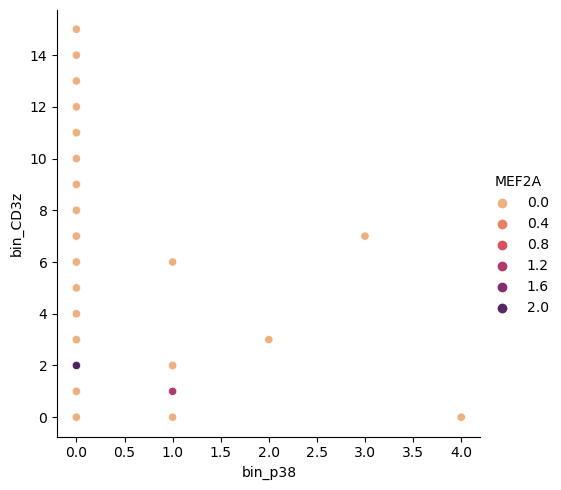

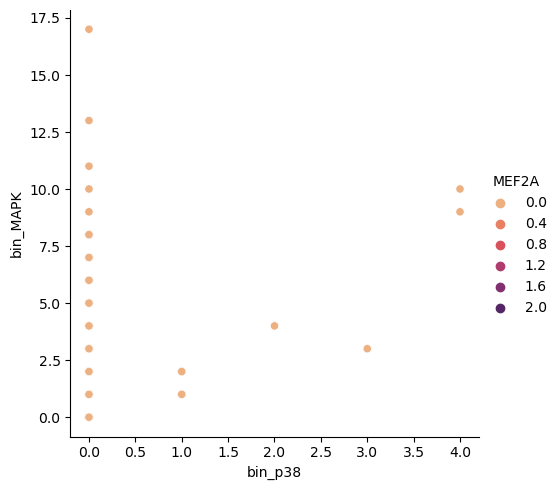

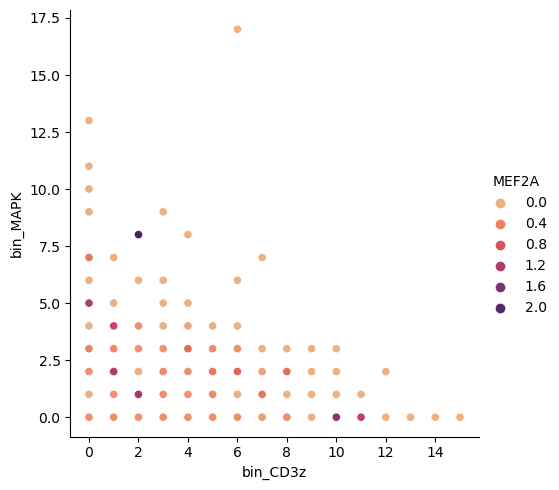

In [9]:
# Use the binning

g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_CD3z", hue = "MEF2A",
    height=5, palette="flare")

g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_MAPK", hue = "MEF2A",
    height=5, palette="flare")


g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_CD3z", y="bin_MAPK", hue = "MEF2A",
    height=5, palette="flare")

If I really want to say something, then I can maybe say that MEF2A is high when CD3z is low, but that might be pushing it?

## With the raw counts

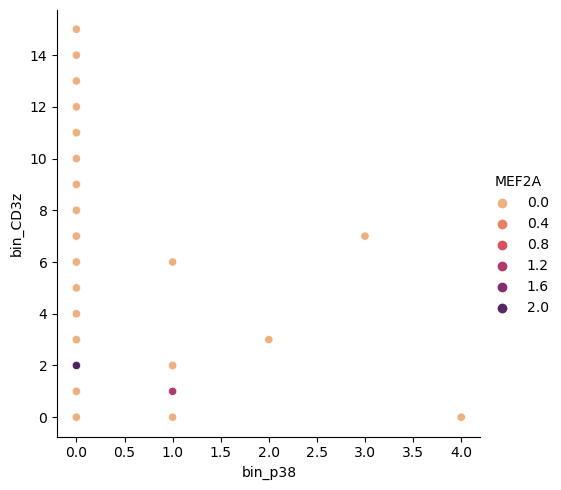

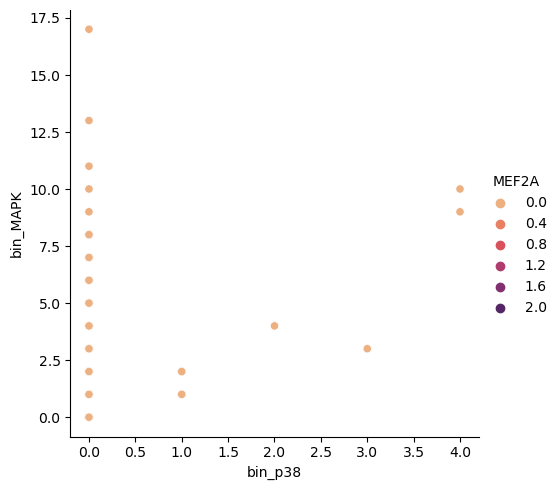

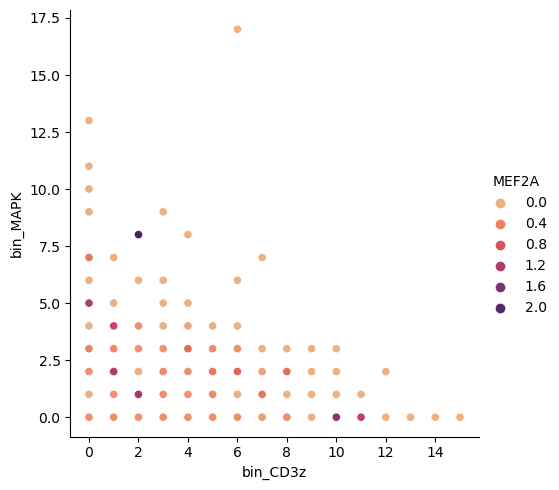

In [10]:
g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_CD3z", hue = "MEF2A",
    height=5, palette="flare")

g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_MAPK", hue = "MEF2A",
    height=5, palette="flare")


g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_CD3z", y="bin_MAPK", hue = "MEF2A",
    height=5, palette="flare")

In [27]:
plt.close("all")

# Calculate the Spearman correlation 

Spearman correlation between the child node and its parent nodes (when the parent node is nonzero). We'll test for existence of the correlation merely (2-sided test)

In [41]:
from scipy.stats import spearmanr
from numpy import cov

In [42]:
def calculate_Spearman_correlation(child_node, parent_node, dataframe, zeros): # zeros is a string: said or all 
    r, pval = spearmanr( a = dataframe[child_node],
                  b = dataframe[parent_node],
                  alternative = "two-sided")
    print(f"The Spearman correlation between {child_node} and its parent node {parent_node} when {zeros} parent node is nonzero is: \n {r} with a p-value of {pval}")

In [43]:
# ATF2
calculate_Spearman_correlation("ATF2", "ERK12", zero_ERK12, "said")
calculate_Spearman_correlation("ATF2", "p38", zero_p38, "said")
print()
calculate_Spearman_correlation("ATF2", "ERK12", zero_ERK12_p38, "all")
calculate_Spearman_correlation("ATF2", "p38", zero_ERK12_p38, "all")

# Plot the correlation matrix
corr = zero_ERK12_p38[["p38", "ERK12", "ATF2"]].corr()
corr.style.background_gradient(cmap='bwr', vmin = -1, vmax = 1)

The Spearman correlation between ATF2 and its parent node ERK12 when said parent node is nonzero is: 
 -0.053346279207714294 with a p-value of 0.0030805858109531977
The Spearman correlation between ATF2 and its parent node p38 when said parent node is nonzero is: 
 -0.0509022769669876 with a p-value of 0.4556732747921126

The Spearman correlation between ATF2 and its parent node ERK12 when all parent node is nonzero is: 
 -0.0028410228599922587 with a p-value of 0.969050978945539
The Spearman correlation between ATF2 and its parent node p38 when all parent node is nonzero is: 
 -0.05328685569753189 with a p-value of 0.4664722667408914


In [49]:
from sklearn import feature_selection

In [58]:
# Mutual information
print(feature_selection.mutual_info_classif(np.array(raw_counts["ERK12"]).reshape(-1, 1), np.ravel(np.array(raw_counts["ATF2"]).reshape(-1, 1)), discrete_features=True, random_state=1))
print(feature_selection.mutual_info_classif(np.array(raw_counts["p38"]).reshape(-1, 1), np.ravel(np.array(raw_counts["ATF2"]).reshape(-1, 1)), discrete_features=True, random_state=1))

[0.03608553]
[0.01021408]


NameError: name 'sklearn' is not defined

In [21]:
# CEBPB
calculate_Spearman_correlation("CEBPB", "ERK12", zero_ERK12, "said")
calculate_Spearman_correlation("CEBPB", "p38", zero_p38, "said")
print()

calculate_Spearman_correlation("CEBPB", "ERK12", zero_ERK12_p38, "all")
calculate_Spearman_correlation("CEBPB", "p38", zero_ERK12_p38, "all")

# Plot the correlation matrix
corr = zero_ERK12_p38[["p38", "ERK12", "CEBPB"]].corr()
corr.style.background_gradient(cmap='bwr', vmin = -1, vmax = 1)

The Spearman correlation between CEBPB and its parent node ERK12 when said parent node is nonzero is: 
 -0.04606590446329 with a p-value of 0.010612334440186577
The Spearman correlation between CEBPB and its parent node p38 when said parent node is nonzero is: 
 -0.049835263597637326 with a p-value of 0.465186552496485

The Spearman correlation between CEBPB and its parent node ERK12 when all parent node is nonzero is: 
 0.05038299636111992 with a p-value of 0.49114169321221646
The Spearman correlation between CEBPB and its parent node p38 when all parent node is nonzero is: 
 0.0027103193432559893 with a p-value of 0.9704741528556513


In [22]:
# NFATC1
calculate_Spearman_correlation("NFATC1", "p38", zero_p38, "said")
calculate_Spearman_correlation("NFATC1", "CD3z", zero_CD3z, "said")
calculate_Spearman_correlation("NFATC1", "MAPK", zero_MAPK, "said")
print()
calculate_Spearman_correlation("NFATC1", "p38", zero_p38_MAPK_CD3z, "all")
calculate_Spearman_correlation("NFATC1", "CD3z", zero_p38_MAPK_CD3z, "all")
calculate_Spearman_correlation("NFATC1", "MAPK", zero_p38_MAPK_CD3z, "all")

# Plot the correlation matrix
corr = zero_p38_MAPK_CD3z[["p38", "CD3z", "MAPK", "NFATC1"]].corr()
corr.style.background_gradient(cmap='bwr', vmin = -1, vmax = 1)

The Spearman correlation between NFATC1 and its parent node p38 when said parent node is nonzero is: 
 -0.0642071959998439 with a p-value of 0.3465306774704082
The Spearman correlation between NFATC1 and its parent node CD3z when said parent node is nonzero is: 
 -0.007408912398315583 with a p-value of 0.619589942243862
The Spearman correlation between NFATC1 and its parent node MAPK when said parent node is nonzero is: 
 -0.035334071689126834 with a p-value of 0.031524002872589524

The Spearman correlation between NFATC1 and its parent node p38 when all parent node is nonzero is: 
 -0.04800798807206931 with a p-value of 0.4858450095897294
The Spearman correlation between NFATC1 and its parent node CD3z when all parent node is nonzero is: 
 -0.013656924666705912 with a p-value of 0.8429256499830662
The Spearman correlation between NFATC1 and its parent node MAPK when all parent node is nonzero is: 
 0.019020616397287013 with a p-value of 0.7825571112577951


In [23]:
# MEF2A
calculate_Spearman_correlation("MEF2A", "p38", zero_p38, "said")
calculate_Spearman_correlation("MEF2A", "CD3z", zero_CD3z, "said")
calculate_Spearman_correlation("MEF2A", "MAPK", zero_MAPK, "said")
print()
calculate_Spearman_correlation("MEF2A", "p38", zero_p38, "all")
calculate_Spearman_correlation("MEF2A", "CD3z", zero_CD3z, "all")
calculate_Spearman_correlation("MEF2A", "MAPK", zero_MAPK, "all")


# Plot the correlation matrix
corr = zero_p38_MAPK_CD3z[["p38", "CD3z", "MAPK", "MEF2A"]].corr()
corr.style.background_gradient(cmap='bwr', vmin = -1, vmax = 1)

The Spearman correlation between MEF2A and its parent node p38 when said parent node is nonzero is: 
 -0.08048247895255133 with a p-value of 0.23774193351636894
The Spearman correlation between MEF2A and its parent node CD3z when said parent node is nonzero is: 
 -0.018117376388970183 with a p-value of 0.22473571218715446
The Spearman correlation between MEF2A and its parent node MAPK when said parent node is nonzero is: 
 -0.013741934451766817 with a p-value of 0.40309969533508516

The Spearman correlation between MEF2A and its parent node p38 when all parent node is nonzero is: 
 -0.08048247895255133 with a p-value of 0.23774193351636894
The Spearman correlation between MEF2A and its parent node CD3z when all parent node is nonzero is: 
 -0.018117376388970183 with a p-value of 0.22473571218715446
The Spearman correlation between MEF2A and its parent node MAPK when all parent node is nonzero is: 
 -0.013741934451766817 with a p-value of 0.40309969533508516


# Write a wrapper function to be able to get those outputs and plots for any node

In [24]:
def analysis_wrapper(child_node, initial_dataframe):
    parents = parents_dict[child_node] # this is a list
    print(parents)
    
    number_parents = len(parents)
    
    # Get the dataframe for which all parents are nonzero
    nonzero = initial_dataframe.copy()
    for i in range(number_parents):
        nonzero = nonzero[nonzero[parents[i]] != 0]
        
    # Plot the correlation matrix
    corr = nonzero[parents + [child_node]].corr()
    sns.heatmap(corr, cmap='bwr', vmin = -1, vmax = 1, annot=True)
    
    # For each parent pair get the corresponding relplot
    for i in range(number_parents):
        for j in range(i+1, number_parents):
            parent_1 = parents[i]
            parent_2 = parents[j]
            
            # Plot the initial data
            g = sns.relplot(
            data= initial_dataframe,
            x=parent_1, y=parent_2, hue = child_node,
            height=5, palette="flare")
            g.set_titles("Initial data")
            
            zero_parent1 = initial_dataframe[initial_dataframe[parent_1]!= 0] 
            zero_parent1_parent2 = initial_dataframe[initial_dataframe[parent_2]!= 0] 
            
            # Plot the initial data without the zeros for those 2 parents
            g = sns.relplot(
            data= zero_parent1_parent2,
            x=parent_1, y=parent_2, hue = child_node,
            height=5, palette="flare")
            g.set_titles("Only those 2 parents are nonzero")
            
            # Plot the initial data without the zeros for any of the parents
            g = sns.relplot(
            data= nonzero,
            x=parent_1, y=parent_2, hue = child_node,
            height=5, palette="flare")
            g.set_titles("All parents are nonzero")
            
            # Bin the data for the parents and replot when all parents are 0
            zero_parent1_parent2[f"bin_{parent_1}"] = pd.cut(zero_parent1_parent2[parent_1], 10, labels=False)
            zero_parent1_parent2[f"bin_{parent_2}"] = pd.cut(zero_parent1_parent2[parent_2], 10, labels=False)
            mean = zero_parent1_parent2.groupby([f"bin_{parent_1}", f"bin_{parent_2}"]).mean().reset_index()
            g = sns.relplot(
            data= mean,
            x=f"bin_{parent_1}", y=f"bin_{parent_2}", hue = child_node,
            height=5, palette="flare")
            g.set_titles("Binned data, all parents are nonzero.")
            
        # For each parent get the correlation
        calculate_Spearman_correlation(child_node, parents[i], initial_dataframe[initial_dataframe[parents[i]]!=0], "said")
        print()
        calculate_Spearman_correlation(child_node, parents[i], nonzero, "all")
        
    

['CD3z', 'MAPK', 'p38']


/tmp/ipykernel_803497/1871786195.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_parent1_parent2[f"bin_{parent_1}"] = pd.cut(zero_parent1_parent2[parent_1], 10, labels=False)
/tmp/ipykernel_803497/1871786195.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_parent1_parent2[f"bin_{parent_2}"] = pd.cut(zero_parent1_parent2[parent_2], 10, labels=False)
/tmp/ipykernel_803497/1871786195.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

The Spearman correlation between NFATC1 and its parent node CD3z when said parent node is nonzero is: 
 -0.007408912398315583 with a p-value of 0.619589942243862

The Spearman correlation between NFATC1 and its parent node CD3z when all parent node is nonzero is: 
 -0.013656924666705912 with a p-value of 0.8429256499830662


/tmp/ipykernel_803497/1871786195.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_parent1_parent2[f"bin_{parent_1}"] = pd.cut(zero_parent1_parent2[parent_1], 10, labels=False)
/tmp/ipykernel_803497/1871786195.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_parent1_parent2[f"bin_{parent_2}"] = pd.cut(zero_parent1_parent2[parent_2], 10, labels=False)


The Spearman correlation between NFATC1 and its parent node MAPK when said parent node is nonzero is: 
 -0.035334071689126834 with a p-value of 0.031524002872589524

The Spearman correlation between NFATC1 and its parent node MAPK when all parent node is nonzero is: 
 0.019020616397287013 with a p-value of 0.7825571112577951
The Spearman correlation between NFATC1 and its parent node p38 when said parent node is nonzero is: 
 -0.0642071959998439 with a p-value of 0.3465306774704082

The Spearman correlation between NFATC1 and its parent node p38 when all parent node is nonzero is: 
 -0.04800798807206931 with a p-value of 0.4858450095897294


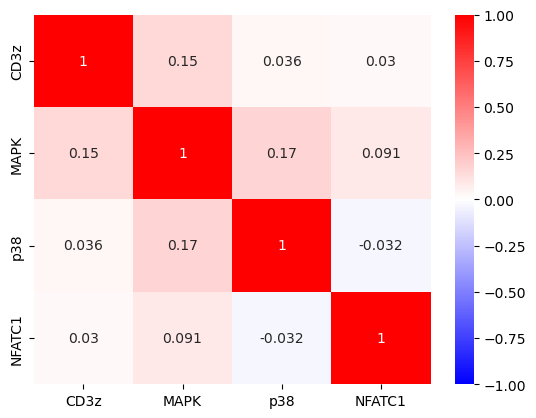

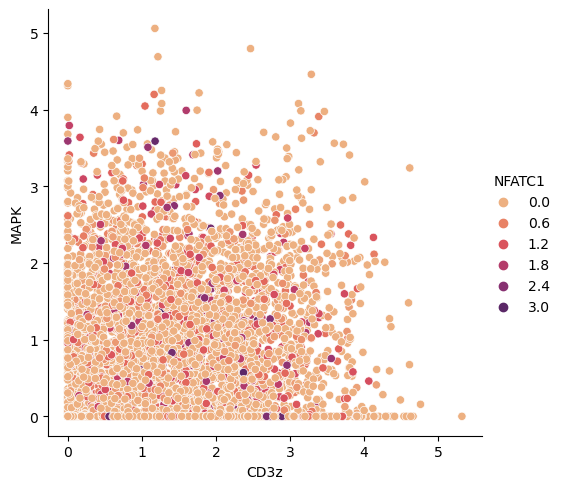

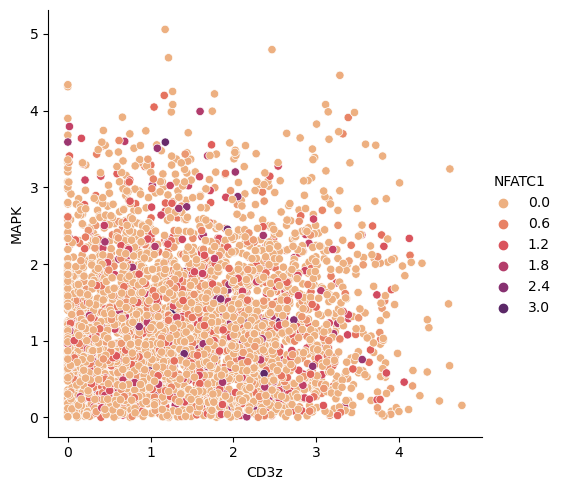

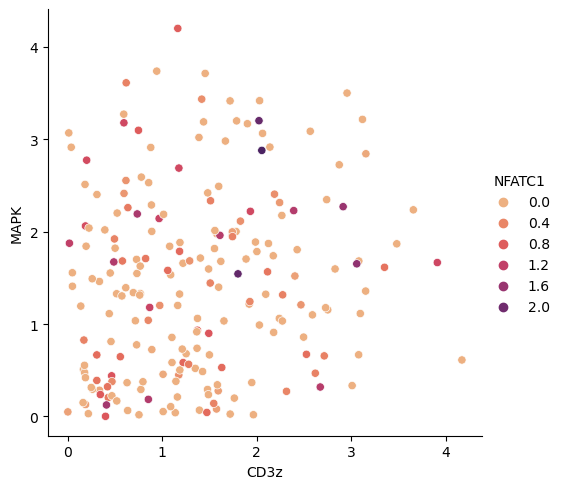

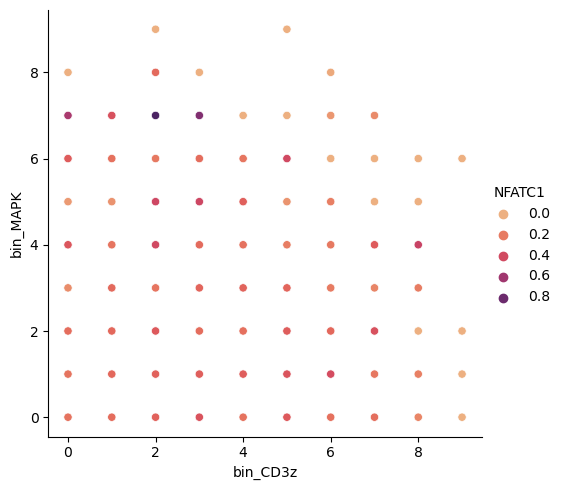

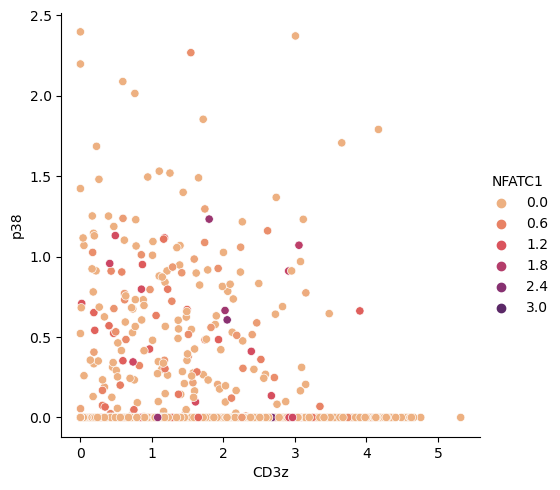

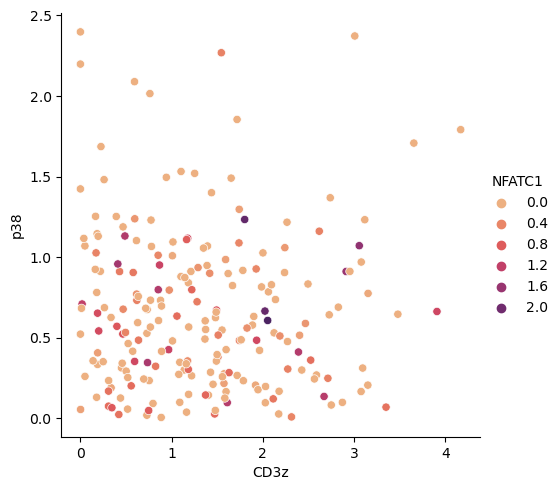

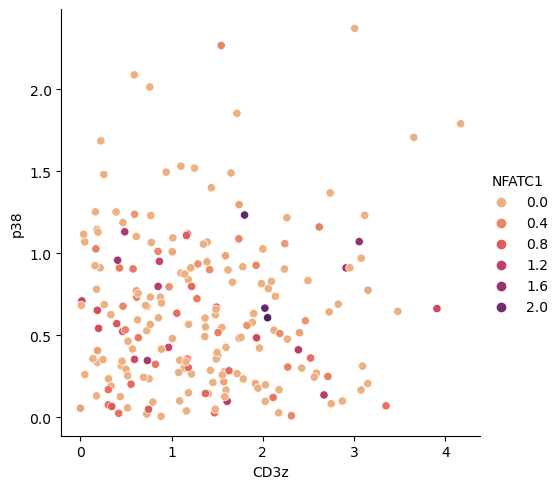

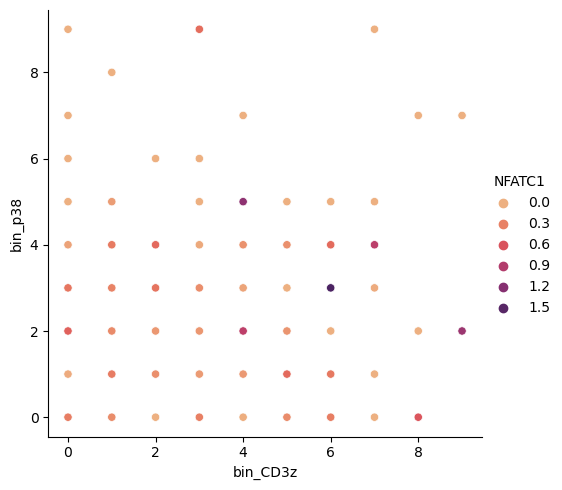

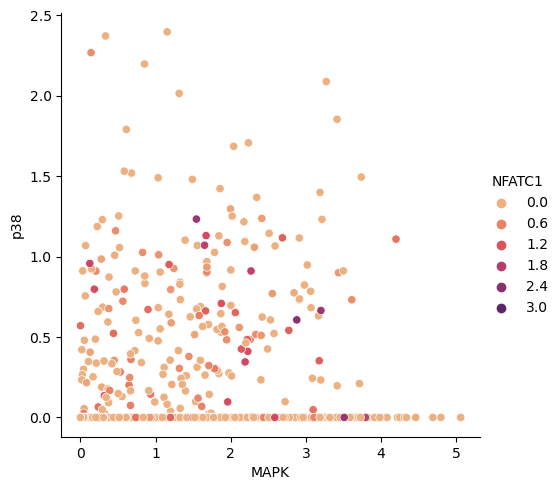

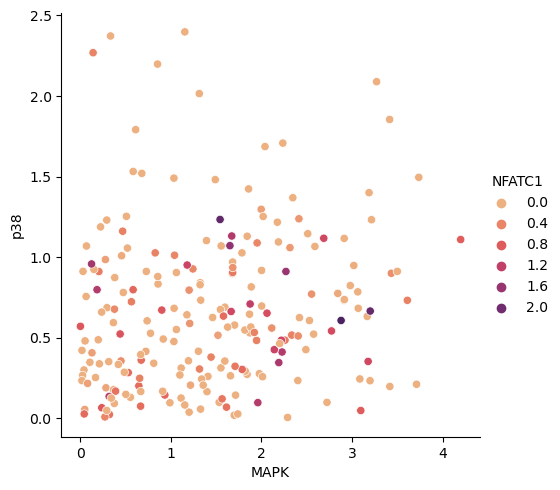

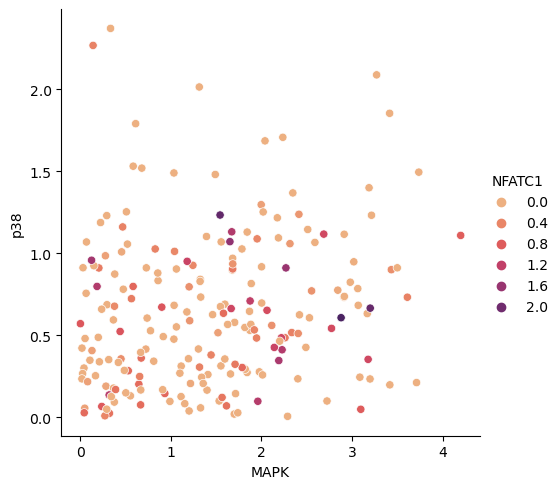

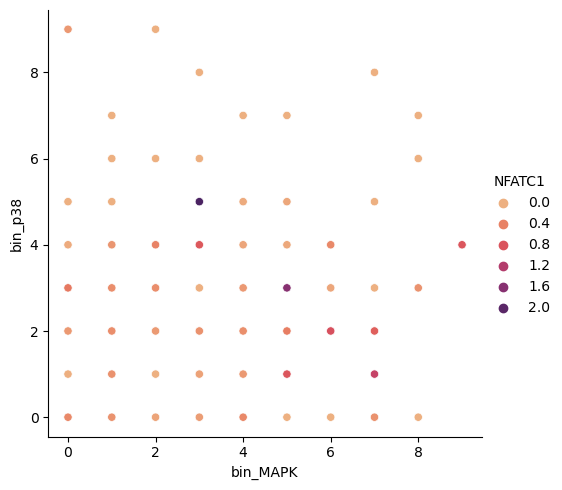

In [25]:
analysis_wrapper("NFATC1", expression_sc)

In [26]:
plt.close("all")

# Group the plots with the raw counts

In [28]:
raw_counts = pd.read_csv("../../CAR_data/raw_counts_post_qc_genes_of_interest.csv", index_col = 0)

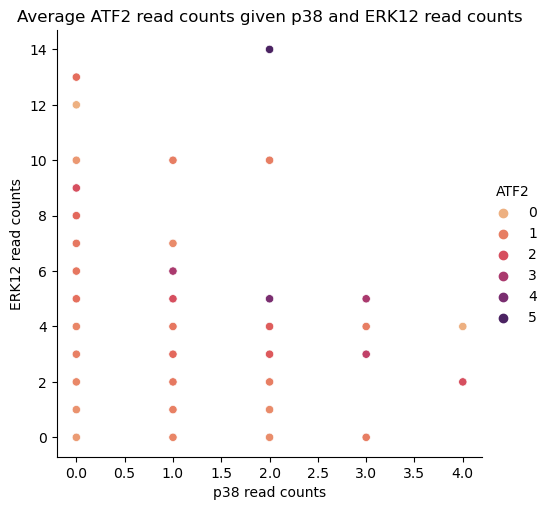

In [29]:
# ATF2
raw_counts["bin_p38"] = pd.cut(raw_counts["p38"], 5, labels = False)
raw_counts["bin_ERK12"] = pd.cut(raw_counts["ERK12"], 15, labels = False)
mean_ERK12_p38_counts = raw_counts.groupby(["bin_p38", "bin_ERK12"]).mean().reset_index()
g = sns.relplot(
    data= mean_ERK12_p38_counts,
    x="bin_p38", y="bin_ERK12", hue="ATF2",
    height=5, palette="flare")
g.set( title = "Average ATF2 read counts given p38 and ERK12 read counts")
g.set(xlabel = "p38 read counts")
g.set(ylabel = "ERK12 read counts")

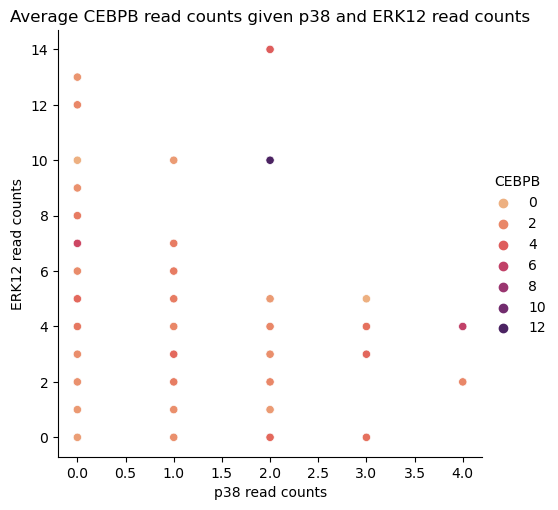

In [30]:
# CEBPB
g = sns.relplot(
    data= mean_ERK12_p38_counts,
    x="bin_p38", y="bin_ERK12", hue="CEBPB",
    height=5, palette="flare")
g.set( title = "Average CEBPB read counts given p38 and ERK12 read counts")
g.set(xlabel = "p38 read counts")
g.set(ylabel = "ERK12 read counts")

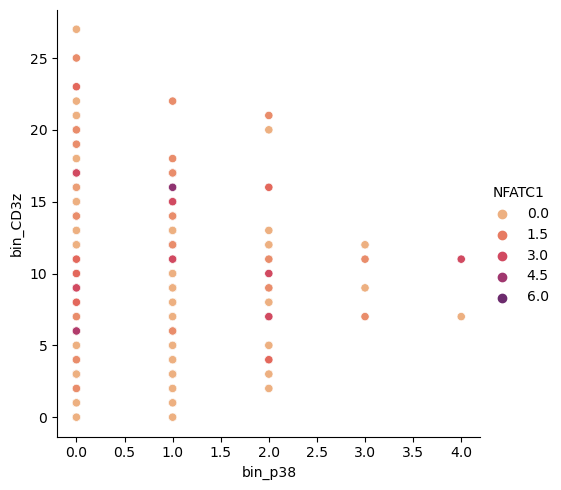

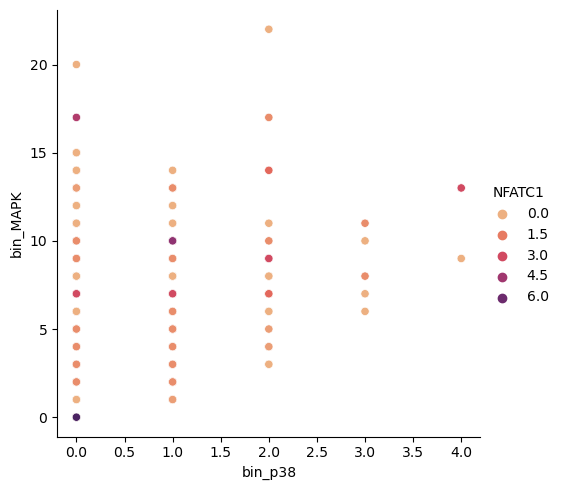

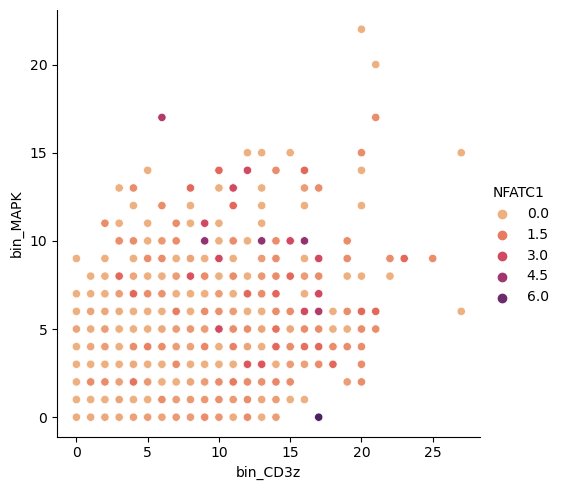

In [31]:
# NFATC1
raw_counts["bin_CD3z"] = pd.cut(raw_counts["CD3z"], int(max(raw_counts["CD3z"])+1), labels = False)
raw_counts["bin_MAPK"] = pd.cut(raw_counts["MAPK"], int(max(raw_counts["MAPK"])+1), labels = False)
mean_p38_MAPK_CD3z = raw_counts.groupby(["bin_CD3z", "bin_MAPK", "bin_p38"]).mean().reset_index()

g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_CD3z", hue = "NFATC1",
    height=5, palette="flare")

g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_MAPK", hue = "NFATC1",
    height=5, palette="flare")


g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_CD3z", y="bin_MAPK", hue = "NFATC1",
    height=5, palette="flare")

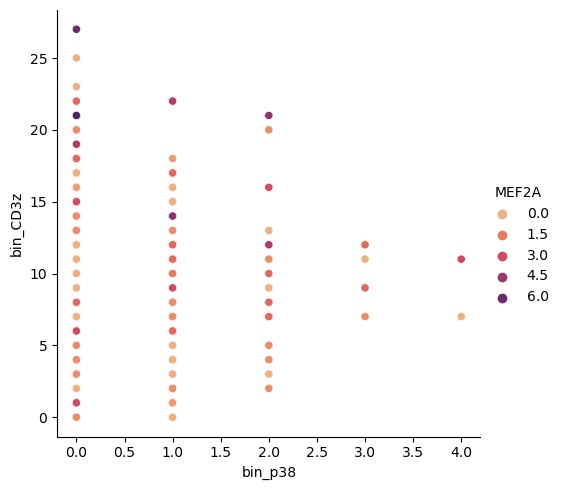

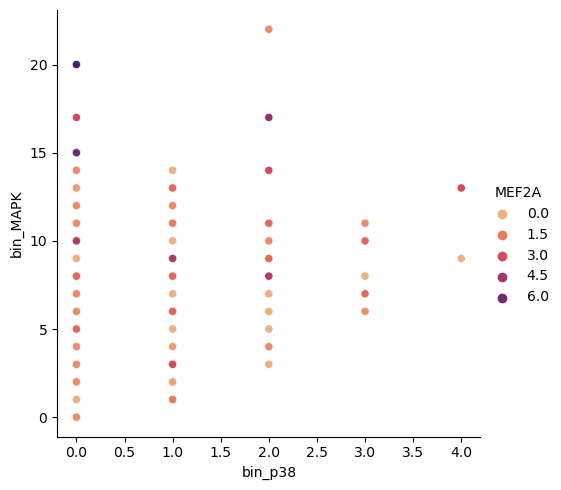

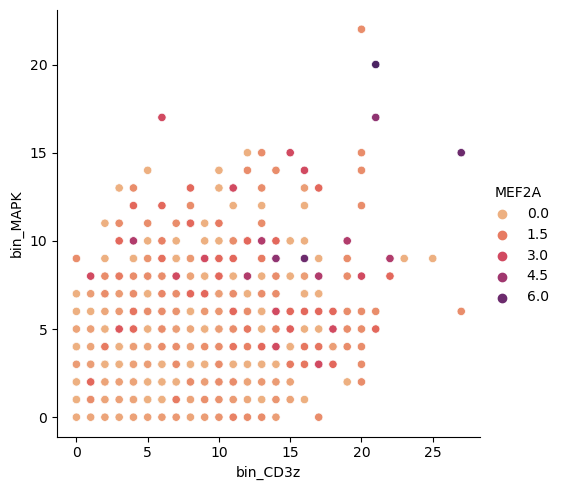

In [32]:
# MEF2A
g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_CD3z", hue = "MEF2A",
    height=5, palette="flare")

g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_p38", y="bin_MAPK", hue = "MEF2A",
    height=5, palette="flare")


g = sns.relplot(
    data= mean_p38_MAPK_CD3z,
    x="bin_CD3z", y="bin_MAPK", hue = "MEF2A",
    height=5, palette="flare")

In [33]:
plt.close("all")

## As a control for the GRN 1-D relationship (see Literature_GRN_sanity_check.ipynb), plot the violinplots on the 2-D relationships

### ATF2

[Text(0.5, 1.0, '')]

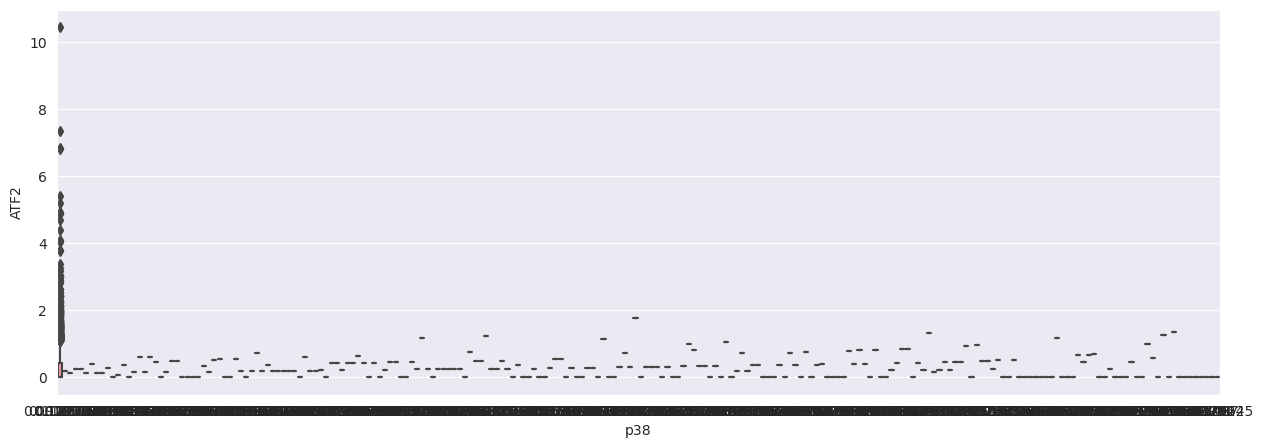

In [16]:
# ATF2
plt.figure(figsize = (15,5))
sns.set_style("darkgrid")
g = sns.boxplot(
    data= raw_counts,
    x="p38", y="ATF2")
g.set(title = "")




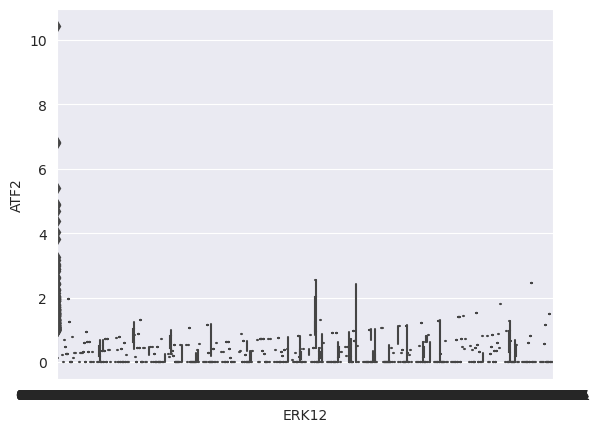

In [12]:
# ATF2
sns.set_style("darkgrid")
g = sns.boxplot(
    data= raw_counts,
    x="ERK12", y="ATF2")

In [13]:
# Kendall's Tau
print(raw_counts["ATF2"].corr(raw_counts["ERK12"], "kendall"))
# Kendall's Tau
print(raw_counts["ATF2"].corr(raw_counts["p38"], "kendall"))

0.05671112211280822
0.06240681062838579


### CEBPB

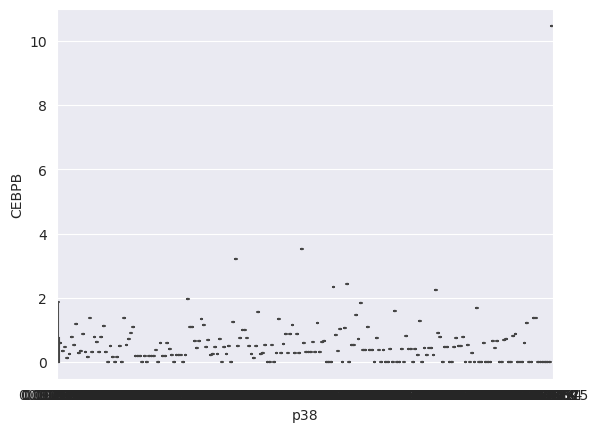

In [14]:
# CEBPB

g = sns.boxplot(
    data= raw_counts,
    x="p38", y="CEBPB", showfliers = False)



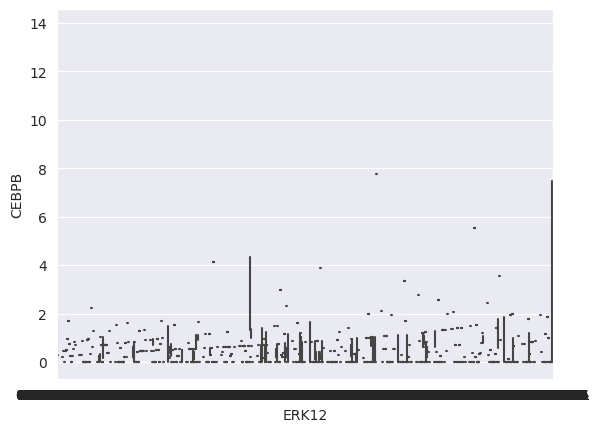

In [15]:
# CEBPB
g = sns.boxplot(
    data= raw_counts,
    x="ERK12", y="CEBPB", showfliers = False)

# Try to predict TF expression from all upstream nodes of the network

In [4]:
import pickle
TFs = pickle.load(open("../../CAR_data/TF_list", "rb"))

In [6]:
"TRAF2" in TFs

False